In [14]:
!pip install ultralytics

In [7]:
from kagglehub import dataset_download

# Download dataset
path = dataset_download("constantinwerner/human-detection-dataset")

print(path);
print("Dataset extracted successfully!")


100%|██████████| 260M/260M [00:12<00:00, 21.5MB/s]

Extracting files...


/root/.cache/kagglehub/datasets/constantinwerner/human-detection-dataset/versions/5
Dataset extracted successfully!


In [8]:
!pwd
!ls -al

/content
total 11912
drwxr-xr-x 1 root root    4096 Mar 31 19:24 .
drwxr-xr-x 1 root root    4096 Mar 31 19:11 ..
drwxr-xr-x 4 root root    4096 Mar 28 13:39 .config
drwxr-xr-x 4 root root    4096 Mar 31 19:22 datasets
drwxr-xr-x 2 root root    4096 Mar 31 19:15 .ipynb_checkpoints
drwxr-xr-x 3 root root    4096 Mar 31 19:22 runs
drwxr-xr-x 1 root root    4096 Mar 28 13:39 sample_data
-rw-r--r-- 1 root root 5613764 Mar 31 19:24 yolo11n.pt
-rw-r--r-- 1 root root 6549796 Mar 31 19:22 yolov8n.pt


In [9]:
!rm -rf ./kagglehub-human-detection-dataset
!mkdir ./kagglehub-human-detection-dataset

In [10]:
!cp -r /root/.cache/kagglehub/datasets/constantinwerner/human-detection-dataset/versions/5/'human detection dataset'/0 ./kagglehub-human-detection-dataset
!cp -r /root/.cache/kagglehub/datasets/constantinwerner/human-detection-dataset/versions/5/'human detection dataset'/1 ./kagglehub-human-detection-dataset

In [11]:
import os
import shutil
from glob import glob

# Define source paths
data_path = "./kagglehub-human-detection-dataset"
human_images = os.path.join(data_path, "1")  # Human images
non_human_images = os.path.join(data_path, "0")  # Non-human images

# print(data_path)
# print(human_images)
# print(non_human_images)

# os.listdir(data_path)
# os.listdir(human_images)
# os.listdir(non_human_images)


# Define YOLO dataset structure
yolo_dataset = "/content/dataset"
train_images = os.path.join(yolo_dataset, "train/images")
train_labels = os.path.join(yolo_dataset, "train/labels")
val_images = os.path.join(yolo_dataset, "valid/images")
val_labels = os.path.join(yolo_dataset, "valid/labels")

# Create folders
for folder in [train_images, train_labels, val_images, val_labels]:
    os.makedirs(folder, exist_ok=True)

# Get image paths
human_files = glob(os.path.join(human_images, "*.png"))  # Adjust extension if needed
# print(human_files)
non_human_files = glob(os.path.join(non_human_images, "*.png"))
# print(non_human_files)

# Split into train/val (80% train, 20% val)
split = int(0.8 * len(human_files))
train_human, val_human = human_files[:split], human_files[split:]
split = int(0.8 * len(non_human_files))
train_non_human, val_non_human = non_human_files[:split], non_human_files[split:]

# Function to move images and create labels
def move_images_and_create_labels(image_list, dest_img_folder, dest_label_folder, class_id):
    for img in image_list:
        # Move image
        shutil.copy(img, os.path.join(dest_img_folder, os.path.basename(img)))

        # Create YOLO label file (dummy full bounding box)
        label_path = os.path.join(dest_label_folder, os.path.basename(img).replace(".png", ".txt"))
        with open(label_path, "w") as f:
            f.write(f"{class_id} 0.5 0.5 1.0 1.0\n")  # Dummy box covering full image

# Move images and generate labels
move_images_and_create_labels(train_human, train_images, train_labels, 0)
move_images_and_create_labels(val_human, val_images, val_labels, 0)
move_images_and_create_labels(train_non_human, train_images, train_labels, 1)
move_images_and_create_labels(val_non_human, val_images, val_labels, 1)

print("Dataset is ready in YOLO format!")


Dataset is ready in YOLO format!


In [12]:
yaml_content = """path: /content/dataset
train: train/images
val: valid/images
names:
  0: person
  1: non-human
"""

with open("/content/dataset/data.yaml", "w") as f:
    f.write(yaml_content)

print("data.yaml created!")


data.yaml created!


In [13]:
from ultralytics import YOLO

# Load YOLO model
model = YOLO("yolov8n.pt")

# Train the model
model.train(data="/content/dataset/data.yaml", epochs=50, imgsz=640, batch=16, device="cuda")
# model.train(data="/content/dataset/data.yaml", epochs=50, imgsz=640, batch=16, device="cpu")


Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

train: Scanning /content/dataset/train/labels... 447 images, 0 backgrounds, 0 corrupt: 100%|██████████| 447/447 [00:02<00:00, 216.14it/s]

train: WARNING ⚠️ /content/dataset/train/images/1.png: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/dataset/train/images/163.png: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/dataset/train/images/275.png: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/dataset/train/images/488.png: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/dataset/train/images/489.png: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/dataset/train/images/495.png: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/dataset/train/images/499.png: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/dataset/train/images/512.png: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/dataset/train/images/514.png: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/dataset/train/images/515.png: corrupt JPEG restored and saved
train: New cache created: /content/dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/valid/labels... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:03<00:00, 33.08it/s]

val: WARNING ⚠️ /content/dataset/valid/images/0.png: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/valid/images/273.png: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/valid/images/494.png: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/valid/images/502.png: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/valid/images/503.png: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/valid/images/507.png: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/valid/images/511.png: corrupt JPEG restored and saved
val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.05G     0.4784      2.265      1.172         51        640: 100%|██████████| 28/28 [00:11<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]

                   all        119        119     0.0032      0.872      0.138     0.0613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.53G     0.2643        1.3      1.014         50        640: 100%|██████████| 28/28 [00:10<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]

                   all        119        119      0.451      0.696      0.568      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.55G     0.2631      1.158      1.009         41        640: 100%|██████████| 28/28 [00:10<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]

                   all        119        119      0.218      0.574      0.192     0.0801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.57G     0.2758      1.143     0.9995         43        640: 100%|██████████| 28/28 [00:10<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]

                   all        119        119      0.101      0.389     0.0824     0.0329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.58G     0.2356       1.06     0.9729         43        640: 100%|██████████| 28/28 [00:09<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]

                   all        119        119      0.448      0.739      0.611      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       2.6G     0.2494      1.056     0.9812         47        640: 100%|██████████| 28/28 [00:09<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        119        119      0.563       0.71       0.68       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.62G     0.2166     0.9617     0.9555         47        640: 100%|██████████| 28/28 [00:09<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        119        119      0.599      0.642      0.617       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.63G     0.2077     0.8687     0.9517         52        640: 100%|██████████| 28/28 [00:09<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]

                   all        119        119       0.72      0.774      0.799      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.65G      0.195     0.8424     0.9416         47        640: 100%|██████████| 28/28 [00:09<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]

                   all        119        119      0.604      0.628      0.618      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.67G     0.2067     0.8163     0.9676         54        640: 100%|██████████| 28/28 [00:08<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        119        119      0.517       0.64      0.535        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.69G     0.1837     0.7962     0.9455         42        640: 100%|██████████| 28/28 [00:08<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        119        119      0.611      0.633       0.68      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       2.7G     0.1841     0.7888     0.9471         45        640: 100%|██████████| 28/28 [00:08<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]

                   all        119        119      0.711       0.84       0.85      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.72G     0.1837     0.7717     0.9566         51        640: 100%|██████████| 28/28 [00:09<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        119        119      0.527      0.812      0.722       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.74G     0.1708     0.7248     0.9425         41        640: 100%|██████████| 28/28 [00:09<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        119        119       0.67      0.842      0.807      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.75G     0.1667     0.7266      0.945         43        640: 100%|██████████| 28/28 [00:09<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]

                   all        119        119      0.748      0.747      0.781      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.77G      0.159     0.6913     0.9368         50        640: 100%|██████████| 28/28 [00:09<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]

                   all        119        119      0.688      0.758       0.76      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.79G      0.148     0.6584      0.923         51        640: 100%|██████████| 28/28 [00:09<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.51it/s]

                   all        119        119      0.603      0.855      0.804      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       2.8G      0.147     0.6666     0.9303         46        640: 100%|██████████| 28/28 [00:10<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all        119        119      0.801      0.825      0.868      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.82G     0.1391     0.6492     0.9271         44        640: 100%|██████████| 28/28 [00:09<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        119        119      0.631      0.804      0.763      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.84G     0.1288     0.6303     0.9237         51        640: 100%|██████████| 28/28 [00:10<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]

                   all        119        119      0.867      0.755      0.909      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.86G     0.1236     0.6036     0.9078         49        640: 100%|██████████| 28/28 [00:09<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]

                   all        119        119      0.821      0.789      0.892      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.88G     0.1244      0.605     0.9164         45        640: 100%|██████████| 28/28 [00:08<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        119        119      0.818       0.78      0.905      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.89G     0.1179     0.5661     0.9037         50        640: 100%|██████████| 28/28 [00:08<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]

                   all        119        119      0.744      0.847      0.848      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.91G     0.1223     0.5786     0.9083         46        640: 100%|██████████| 28/28 [00:08<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all        119        119      0.765      0.715      0.832      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.92G     0.1138     0.5747     0.9089         41        640: 100%|██████████| 28/28 [00:09<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        119        119      0.833       0.86       0.91      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.94G     0.1128     0.5633     0.9088         49        640: 100%|██████████| 28/28 [00:10<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.04it/s]

                   all        119        119      0.823      0.865      0.926      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.96G     0.1148     0.5381     0.9122         49        640: 100%|██████████| 28/28 [00:09<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        119        119       0.83      0.867      0.929      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.98G     0.1114     0.5306     0.9137         43        640: 100%|██████████| 28/28 [00:09<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.51it/s]

                   all        119        119      0.741      0.883      0.886      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.99G     0.1028     0.5117     0.9042         40        640: 100%|██████████| 28/28 [00:09<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.51it/s]

                   all        119        119      0.857       0.88      0.925      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.01G     0.1059     0.5262     0.9164         50        640: 100%|██████████| 28/28 [00:09<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all        119        119      0.729      0.916      0.883      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.03G    0.09938     0.5172     0.9114         45        640: 100%|██████████| 28/28 [00:09<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        119        119      0.859      0.798      0.897      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.04G     0.0988     0.5294     0.9131         38        640: 100%|██████████| 28/28 [00:09<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        119        119       0.84      0.919      0.928      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.06G    0.09813     0.5291     0.9155         44        640: 100%|██████████| 28/28 [00:09<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        119        119      0.691      0.909      0.845      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.08G    0.09029     0.4948      0.911         47        640: 100%|██████████| 28/28 [00:08<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        119        119      0.791      0.906      0.897      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       3.1G    0.08907     0.4619     0.8991         44        640: 100%|██████████| 28/28 [00:08<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

                   all        119        119      0.836      0.839      0.905      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.11G    0.08727     0.4652     0.9088         49        640: 100%|██████████| 28/28 [00:09<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]

                   all        119        119      0.773      0.911        0.9      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.13G    0.08774     0.4423      0.904         40        640: 100%|██████████| 28/28 [00:09<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        119        119       0.73      0.918      0.894      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.15G    0.07915     0.4724     0.9004         48        640: 100%|██████████| 28/28 [00:09<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all        119        119      0.853      0.827      0.901      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.17G    0.07739     0.4492     0.9075         46        640: 100%|██████████| 28/28 [00:09<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all        119        119      0.825      0.909      0.931      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.18G    0.07717     0.4254     0.8838         43        640: 100%|██████████| 28/28 [00:09<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        119        119      0.782      0.951       0.91      0.909


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       3.2G    0.08767     0.4228     0.9339         15        640: 100%|██████████| 28/28 [00:11<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        119        119      0.884      0.896      0.929      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.21G    0.07039      0.297     0.9189         15        640: 100%|██████████| 28/28 [00:09<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]

                   all        119        119      0.881      0.891      0.943      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.23G    0.07098     0.2704     0.9227         15        640: 100%|██████████| 28/28 [00:09<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        119        119      0.896      0.882      0.933      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.25G    0.06006     0.2136     0.9079         15        640: 100%|██████████| 28/28 [00:09<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        119        119      0.891      0.883      0.951      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.27G     0.0526     0.2436     0.9193         15        640: 100%|██████████| 28/28 [00:09<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        119        119      0.913      0.875      0.944      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.28G    0.04938     0.2842     0.8836         15        640: 100%|██████████| 28/28 [00:08<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]

                   all        119        119      0.869      0.896      0.927      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       3.3G     0.0457     0.1809     0.8985         15        640: 100%|██████████| 28/28 [00:08<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        119        119      0.893      0.874      0.931      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.32G    0.04032     0.1822     0.9227         15        640: 100%|██████████| 28/28 [00:08<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        119        119      0.869      0.908       0.93       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.33G    0.04486      0.187     0.8935         15        640: 100%|██████████| 28/28 [00:09<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all        119        119      0.867       0.91      0.934      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.35G    0.04443      0.191     0.9023         15        640: 100%|██████████| 28/28 [00:09<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        119        119      0.799      0.922      0.928      0.928



50 epochs completed in 0.168 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]


                   all        119        119      0.891      0.883      0.951      0.951
                person         46         46      0.885      0.848      0.932      0.932
             non-human         73         73      0.897      0.918       0.97       0.97
Speed: 0.5ms preprocess, 3.1ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cd1f9996d50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [3]:
# Download COCO val
import torch
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
!unzip -q tmp.zip -d datasets && rm tmp.zip  # unzip

100%|██████████| 780M/780M [00:20<00:00, 39.7MB/s]


In [4]:
# Validate YOLOv8n on COCO8 val
!yolo val model=yolov8n.pt data=coco8.yaml

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 6.25M/6.25M [00:00<00:00, 322MB/s]
Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

Dataset 'coco8.yaml' images not found ⚠️, missing path '/content/datasets/coco8/images/val'
100% 433k/433k [00:00<00:00, 82.2MB/s]
Unzipping /content/datasets/coco8.zip to /content/datasets/coco8...: 100% 25/25 [00:00<00:00, 3476.02file/s]
Dataset download success ✅ (1.9s), saved to /content/datasets

100% 755k/755k [00:00<00:00, 81.3MB/s]
val: Scanning /content/datasets/coco8/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100% 4/4 [00:00<00:00, 109.52it/s]
val: New cache crea

In [6]:
# Train YOLOv8n on COCO8 for 10 epochs
!yolo train model=yolov8n.pt data=coco8.yaml epochs=10 imgsz=640

Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco8.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wid

In [ ]:
from ultralytics import YOLO

# Load YOLO model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Train the model
# model.train(data="/content/dataset/data.yaml", epochs=50, imgsz=640, batch=16, device="cuda")


In [45]:
# Load trained model
model = YOLO("/content/runs/detect/train3/weights/best.pt")
# model = YOLO("/content/yolov8n.pt")

# Test on an image
results = model("https://ultralytics.com/images/bus.jpg", save=True, conf=0.5)

# Show detected objects
for result in results:
    print(result.boxes)



Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 1 person, 9.4ms
Speed: 3.5ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict3
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.9821], device='cuda:0')
data: tensor([[0.0000e+00, 4.2837e+00, 8.0877e+02, 1.0799e+03, 9.8211e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (1080, 810)
shape: torch.Size([1, 6])
xywh: tensor([[ 404.3832,  542.0693,  808.7665, 1075.5713]], device='cuda:0')
xywhn: tensor([[0.4992, 0.5019, 0.9985, 0.9959]], device='cuda:0')
xyxy: tensor([[   0.0000,    4.2837,  808.7665, 1079.8550]], device='cuda:0')
xyxyn: tensor([[0.0000, 0.0040, 0.9985, 0.9999]], device='cuda:0')


In [ ]:
model.export(format="onnx")  # Export to ONNX format

In [46]:
from ultralytics import YOLO

# Load trained model
model = YOLO("/content/runs/detect/train3/weights/best.pt")  # Adjust path if needed

# Validate model on validation set
metrics = model.val()

# Extract metrics from results_dict
precision = metrics.results_dict['metrics/precision(B)']
recall = metrics.results_dict['metrics/recall(B)']
map50 = metrics.results_dict['metrics/mAP50(B)']
map50_95 = metrics.results_dict['metrics/mAP50-95(B)']

# Print important metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"mAP50: {map50:.4f}")  # Mean Average Precision at 50% IoU
print(f"mAP50-95: {map50_95:.4f}")  # Mean Average Precision at 50-95% IoU


Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/dataset/valid/labels.cache... 119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/dataset/valid/images/0.png: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/valid/images/273.png: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/valid/images/494.png: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/valid/images/502.png: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/valid/images/503.png: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/valid/images/507.png: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/dataset/valid/images/511.png: corrupt JPEG restored and saved



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.25it/s]


                   all        119        119      0.892      0.883      0.952      0.952
                person         46         46      0.885      0.848      0.934      0.934
             non-human         73         73      0.898      0.918       0.97       0.97
Speed: 5.6ms preprocess, 5.9ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/val12
Precision: 0.8917
Recall: 0.8828
mAP50: 0.9522
mAP50-95: 0.9522


In [47]:
# Get validation results
f1_score = 2 * (precision * recall) / (precision + recall)  # F1-Score

# Assume accuracy is estimated as mAP50 for simplicity
accuracy = metrics.box.map50

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1_score:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Accuracy: 0.9522
F1 Score: 0.8872
Precision: 0.8917
Recall: 0.8828


In [37]:
with open("metrics.txt", "w") as f:
    f.write(f"Accuracy: {accuracy:.4f}\n")
    f.write(f"F1 Score: {f1_score:.4f}\n")
    f.write(f"Precision: {precision:.4f}\n")
    f.write(f"Recall: {recall:.4f}\n")

print("Metrics saved to 'metrics.txt'!")


Metrics saved to 'metrics.txt'!


In [19]:
!pip install scikit-learn matplotlib

In [48]:
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from glob import glob
import cv2

# Load trained YOLO model
model = YOLO("/content/runs/detect/train3/weights/best.pt")

# Path to validation images
val_images = glob("/content/dataset/valid/images/*.png")

# Initialize lists to store ground truth and confidence scores
y_true = []
y_scores = []

# Process each image
for img_path in val_images:
    # Load image
    img = cv2.imread(img_path)

    # Get detections
    results = model(img)

    # Process results
    for result in results:
        for box in result.boxes:
            cls = int(box.cls[0])  # Class label (0 = Non-human, 1 = Human)
            conf = float(box.conf[0])  # Detection confidence

            y_true.append(cls)  # Append actual label
            y_scores.append(conf)  # Append confidence score

# Convert lists to NumPy arrays
y_true = np.array(y_true)
y_scores = np.array(y_scores)



0: 576x640 1 non-human, 10.9ms
Speed: 3.2ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 640)

0: 640x640 1 non-human, 8.0ms
Speed: 3.3ms preprocess, 8.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 608x640 1 non-human, 7.9ms
Speed: 2.3ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 640)

0: 640x640 1 non-human, 8.0ms
Speed: 3.8ms preprocess, 8.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 non-human, 7.3ms
Speed: 3.0ms preprocess, 7.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 608x640 1 non-human, 7.9ms
Speed: 3.5ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 640)

0: 640x640 1 non-human, 8.0ms
Speed: 3.3ms preprocess, 8.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 512x640 1 person, 7.4ms
Speed: 3.4ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1

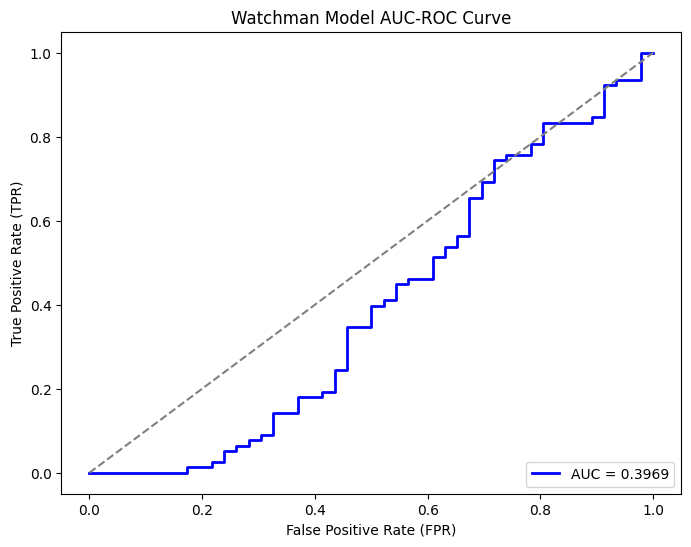

In [49]:
# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random baseline
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Watchman Model AUC-ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [44]:
plt.savefig("auc_roc_curve.png")

with open("auc_score.txt", "w") as f:
    f.write(f"AUC Score: {roc_auc:.4f}\n")

print("✅ AUC-ROC Curve saved as 'auc_roc_curve.png' and AUC Score saved in 'auc_score.txt'.")


✅ AUC-ROC Curve saved as 'auc_roc_curve.png' and AUC Score saved in 'auc_score.txt'.


<Figure size 640x480 with 0 Axes>

In [ ]:
from ultralytics import YOLO

# Load trained model
model = YOLO("/content/runs/detect/train3/weights/best.pt")

# Validate model on test data
results = model.val()

# Extract mAP values
mAP50 = results.results_dict["metrics/mAP50(B)"] * 100  # mAP@0.5
mAP50_95 = results.results_dict["metrics/mAP50-95(B)"] * 100  # mAP@0.5:0.95

print(f"mAP@0.5: {mAP50:.2f}%")
print(f"mAP@0.5:0.95: {mAP50_95:.2f}%")
